In [1]:
import sys
sys.path.append("/users/munozr/mycodes")
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import LinData
import pandas as pd
from data_analysis_codes.tools import NumMethods

In [2]:
import h5py
from data_analysis_codes.tools import Plot2d
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import FD as FD_file
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import GetVars_Plot2d as GVar
from data_analysis_codes.tools import Ricci_CoGrad_Weyl as RCW_file

In [3]:
paramA = RRead.read_parameters('pflrw_d3e2_L1206_t1_N128_EdS')
Lin = LinData.LinData_Class(paramA)
fA = pd.read_table(paramA['datapath']+'h5_data.csv', delimiter=',')
fAc = pd.read_table(paramA['datapath']+'constraints.csv', delimiter=',')

 read time file


In [4]:
param32_CLmK = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_CLPT_mK')
f32_CLmK = pd.read_table(param32_CLmK['datapath']+'h5_data.csv', delimiter=',')
fc32_CLmK = pd.read_table(param32_CLmK['datapath']+'constraints.csv', delimiter=',')

In [5]:
param32_CLmKP = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_CLPT_mKPunc')
f32_CLmKP = pd.read_table(param32_CLmKP['datapath']+'h5_data.csv', delimiter=',')
fc32_CLmKP = pd.read_table(param32_CLmKP['datapath']+'constraints.csv', delimiter=',')

In [7]:
param_CLmK = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_CLPT_mK')
f_CLmK = pd.read_table(param_CLmK['datapath']+'h5_data.csv', delimiter=',')
fc_CLmK = pd.read_table(param_CLmK['datapath']+'constraints.csv', delimiter=',')

In [26]:
param_GRHCLmK = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_GRH_CLPT_mK')
f_GRHCLmK = pd.read_table(param_GRHCLmK['datapath']+'h5_data.csv', delimiter=',')
fc_GRHCLmK = pd.read_table(param_GRHCLmK['datapath']+'constraints.csv', delimiter=',')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


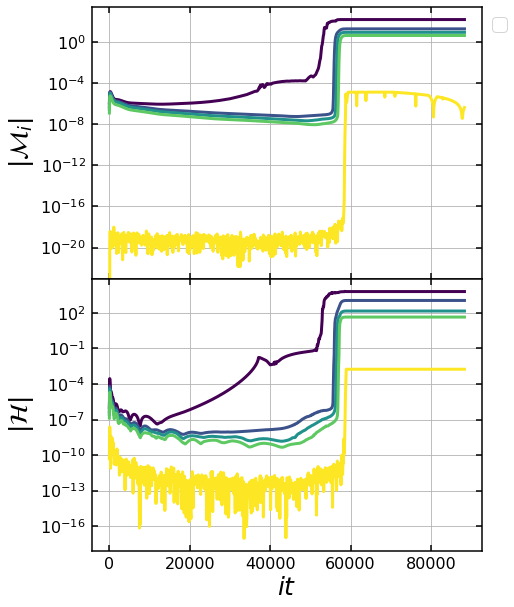

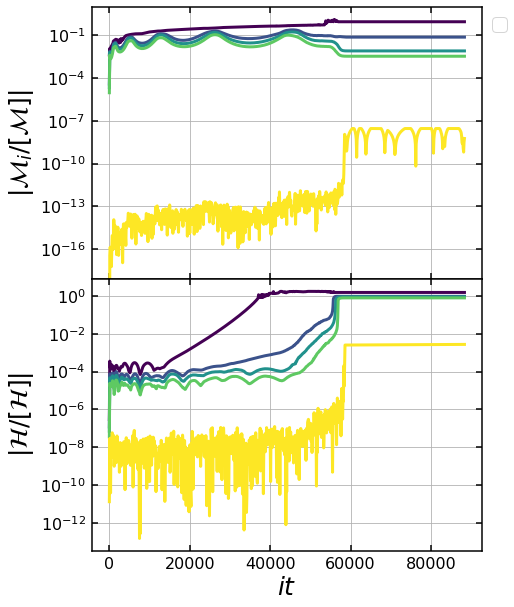

In [14]:
RRead.plot_constraints(fc_CLmK)
RRead.plot_constraintsEScale(fc_CLmK)

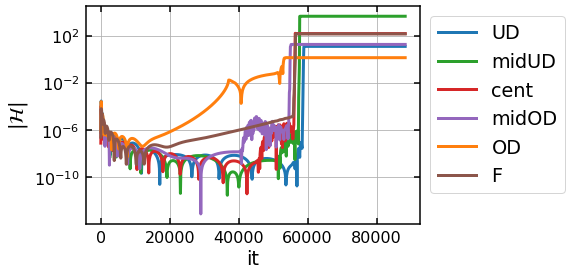

In [15]:
fdata = fc_CLmK
temp = 'it'
var = 'Ham'
plt.semilogy(fdata[temp], abs(fdata[var+'_UD']), color='C0', label='UD')
plt.semilogy(fdata[temp], abs(fdata[var+'_midUD']), color='C2', label='midUD')
plt.semilogy(fdata[temp], abs(fdata[var+'_cent']), color='C3', label='cent')
plt.semilogy(fdata[temp], abs(fdata[var+'_midOD']), color='C4', label='midOD')
plt.semilogy(fdata[temp], abs(fdata[var+'_OD']), color='C1', label='OD')
plt.semilogy(fdata[temp], abs(fdata[var+'_F']), color='C5', label='F')
plt.grid()
plt.ylabel(r'$|\mathcal{H}|$')
plt.xlabel('it')
plt.legend(bbox_to_anchor=(1,1))

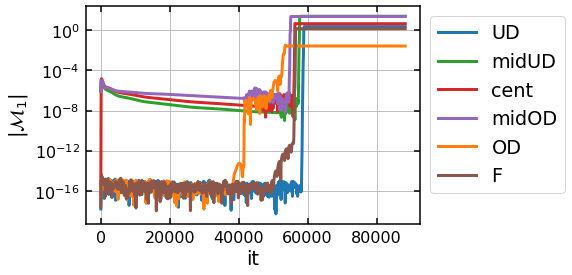

In [16]:
fdata = fc_CLmK
temp = 'it'
var = 'Mom1'
plt.semilogy(fdata[temp], abs(fdata[var+'_UD']), color='C0', label='UD')
plt.semilogy(fdata[temp], abs(fdata[var+'_midUD']), color='C2', label='midUD')
plt.semilogy(fdata[temp], abs(fdata[var+'_cent']), color='C3', label='cent')
plt.semilogy(fdata[temp], abs(fdata[var+'_midOD']), color='C4', label='midOD')
plt.semilogy(fdata[temp], abs(fdata[var+'_OD']), color='C1', label='OD')
plt.semilogy(fdata[temp], abs(fdata[var+'_F']), color='C5', label='F')
plt.grid()
plt.ylabel(r'$|\mathcal{M}_1|$')
plt.xlabel('it')
plt.legend(bbox_to_anchor=(1,1))

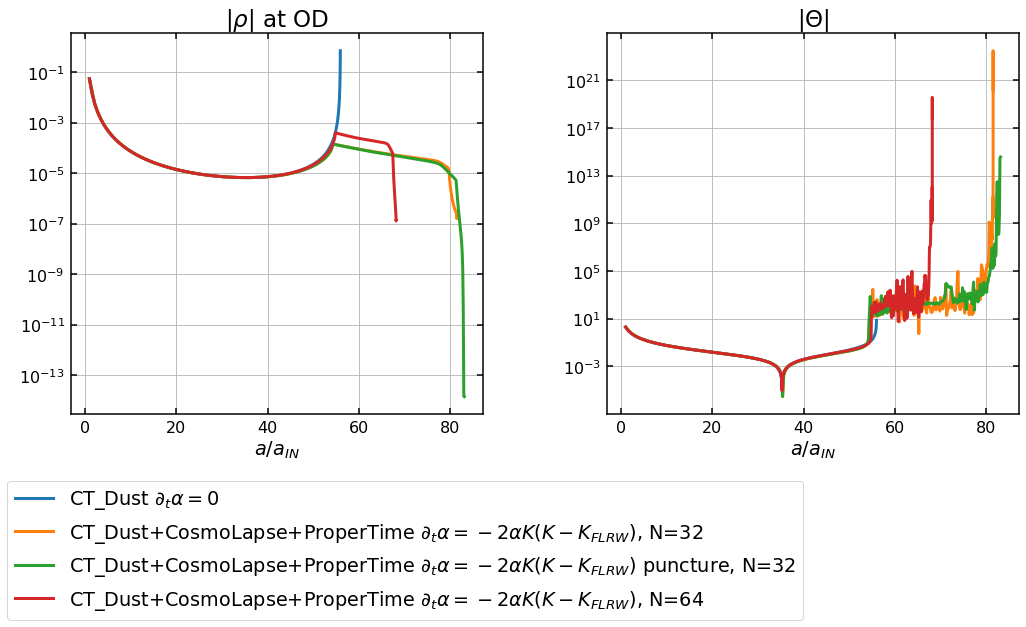

In [8]:
plt.figure(figsize=(17, 7))
loc = 'OD'
anA = fA['t']
anA = Lin.an_initial(fA['t'])
alphafac = 0.2

temporal = 'an_'

def plot_old(varname):
    plt.semilogy(anA, abs(fA[varname+loc]), label=r'CT_Dust $\partial_t \alpha = 0$')

def plot_new(varname):
    varstr = varname+loc
    plt.semilogy(f32_CLmK[temporal+loc], abs(f32_CLmK[varstr]), 
                 label=r'CT_Dust+CosmoLapse+ProperTime $\partial_t \alpha = -2 \alpha K (K - K_{FLRW})$, N=32')
    plt.semilogy(f32_CLmKP[temporal+loc], abs(f32_CLmKP[varstr]), 
                 label=r'CT_Dust+CosmoLapse+ProperTime $\partial_t \alpha = -2 \alpha K (K - K_{FLRW})$ puncture, N=32')
    plt.semilogy(f_CLmK[temporal+loc], abs(f_CLmK[varstr]), 
                 label=r'CT_Dust+CosmoLapse+ProperTime $\partial_t \alpha = -2 \alpha K (K - K_{FLRW})$, N=64')

ax1 = plt.subplot(121)
plot_old('rho_')
plot_new('rho_u_')
plt.grid()
plt.title(r'$|\rho|$'+' at '+loc)
plt.xlabel(r'$a/a_{IN}$')

ax2 = plt.subplot(122)
plot_old('K_')
plot_new('Theta_')
plt.grid()
plt.title(r'$|\Theta|$')
plt.xlabel(r'$a/a_{IN}$')
plt.legend(bbox_to_anchor=(0.5,-0.15))

plt.subplots_adjust(wspace = 0.3)

In [17]:
f32_CLmKP.keys()

Index(['it', 't', 'gdet_av', 'gdet_L1', 'gdet_var', 'gdet_max', 'gdet_min',
       'gdet_OD', 'gdet_midOD', 'gdet_cent',
       ...
       'ddrho_u_UD', 'ddTheta_UD', 'a_F', 'an_F', 'H_F', 'z_F', 'drho_u_F',
       'dTheta_F', 'ddrho_u_F', 'ddTheta_F'],
      dtype='object', length=654)

Text(0.5, 0, '$t$')

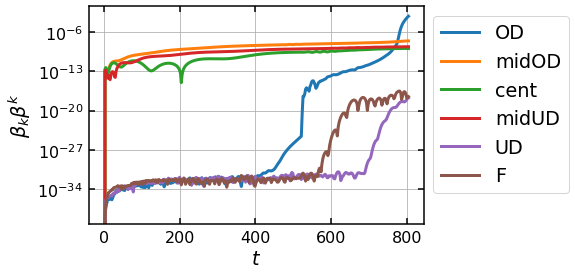

In [20]:
#plt.plot(f32_CLmK['t'], f32_CLmK['bsq_OD'], label='1+log')


In [ ]:
plt.semilogy(f32_CLmKP['t'], f32_CLmKP['betax_OD'], label=loc)
plt.grid()
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel(r'$\beta_k\beta^k$')
plt.xlabel(r'$t$')

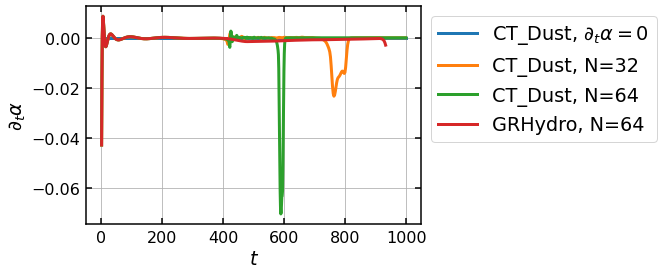

In [76]:
plt.plot(f_CLmK['t'], [0.0]*len(f_CLmK['dtalpha_OD']), label=r'CT_Dust, $\partial_t \alpha = 0$')
plt.plot(f32_CLmK['t'], f32_CLmK['dtalpha_OD'], label='CT_Dust, N=32')
plt.plot(f_CLmK['t'], f_CLmK['dtalpha_OD'], label='CT_Dust, N=64')
plt.plot(f_GRHCLmK['t'], f_GRHCLmK['dtalpha_OD'], label='GRHydro, N=64')
plt.grid()
plt.xlabel(r'$t$')
plt.ylabel(r'$\partial_t\alpha$')
plt.legend(bbox_to_anchor=(1,1))

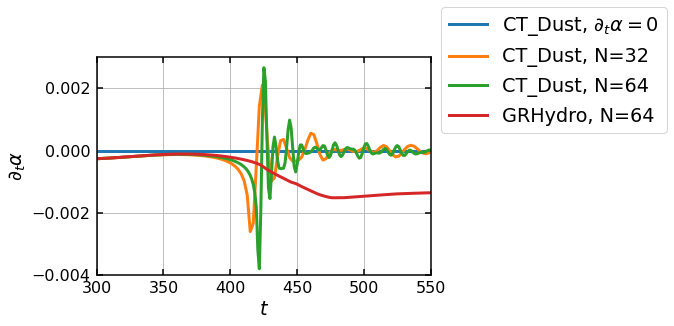

In [49]:
plt.plot(f_CLmK['t'], [0.0]*len(f_CLmK['dtalpha_OD']), label=r'CT_Dust, $\partial_t \alpha = 0$')
plt.plot(f32_CLmK['t'], f32_CLmK['dtalpha_OD'], label='CT_Dust, N=32')
plt.plot(f_CLmK['t'], f_CLmK['dtalpha_OD'], label='CT_Dust, N=64')
plt.plot(f_GRHCLmK['t'], f_GRHCLmK['dtalpha_OD'], label='GRHydro, N=64')
plt.grid()
plt.xlabel(r'$t$')
plt.ylabel(r'$\partial_t\alpha$')
plt.xlim(300, 550)
plt.ylim(-0.004, 0.003)
plt.legend(bbox_to_anchor=(1,1.275))

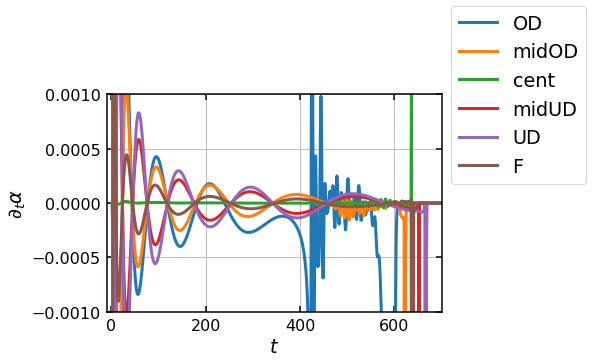

In [74]:
for loc in ['OD', 'midOD', 'cent', 'midUD', 'UD', 'F']:
    plt.plot(f_CLmK['t'], f_CLmK['dtalpha_'+loc], label=loc)
plt.grid()
plt.xlabel(r'$t$')
plt.ylabel(r'$\partial_t\alpha$')
plt.xlim(-10, 700)
plt.ylim(-0.001, 0.001)
plt.legend(bbox_to_anchor=(1,0.545))

In [19]:
kOD = []
for k in f_CLmK.keys():
    if '_OD' in k:
        kOD += [k]
print(kOD)

['gdet_OD', 'gxx_OD', 'gxy_OD', 'gxz_OD', 'gyy_OD', 'gyz_OD', 'gzz_OD', 'guxx_OD', 'guxy_OD', 'guxz_OD', 'guyy_OD', 'guyz_OD', 'guzz_OD', 'aloc_OD', 'tau_OD', 'RicciS_OD', 'alpha_OD', 'dtalpha_OD', 'rho_u_OD', 'W_OD', 'u0up_OD', 'u1down_OD', 'u2down_OD', 'u3down_OD', 'hdet4_OD', 'hdet3_OD', 'T00_OD', 'rho_n_OD', 'Kxx_OD', 'K_OD', 'A2_OD', 'Theta_OD', 'shear2_OD', 'E2_OD', 'divE_norm_OD', 'curlE_norm_OD', 'B2_OD', 'divB_norm_OD', 'curlB_norm_OD', 'B2/E2_OD', 'divB/divE_OD', 'curlB/curlE_OD', 'a_OD', 'an_OD', 'H_OD', 'z_OD', 'drho_u_OD', 'dTheta_OD', 'ddrho_u_OD', 'ddTheta_OD']


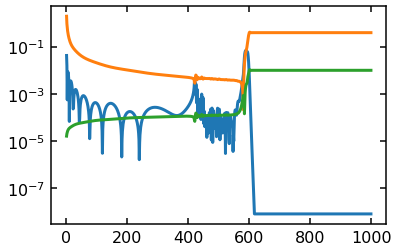

In [23]:
#kOD = ['gxy_OD', 'gxz_OD', 'gyz_OD', 'guxy_OD', 'guxz_OD', 'guyz_OD', 
kOD = ['gxy_OD', 'dtalpha_OD', 'RicciS_OD', 'u1down_OD', 'K_OD', 'A2_OD', 'Kxx_OD']
kOD = ['dtalpha_OD', 'K_OD', 'Kxx_OD']
for k in kOD:
    plt.semilogy(f_CLmK['t'], abs(f_CLmK[k]))